In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import pandas as pd 

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.misc import electrocardiogram

from scipy.stats import linregress


import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data xy1 = np.loadtxt('XYR1_90_Dic.txt', dtype=int, delimiter=',')
xy1 = np.loadtxt('XYR1_90_Dic.txt', dtype=int, delimiter=',')
xy2 = np.loadtxt('XYR2_90_Dic.txt', dtype=int, delimiter=',')
xy3 = np.loadtxt('XYR3_90_Dic.txt', dtype=int, delimiter=',')
print(type(xy1))

<class 'numpy.ndarray'>


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy1)

In [5]:
# STEP 3: Graphs to keep and Extract Data (OR JUST DO ALL OF THEM.. FUCK IT)
x1, y1 = [xy1[8], xy1[18], xy1[4]], [xy1[9], xy1[19],xy1[5]]

In [6]:
# # STEP 4: VIEW new PLOTS (or skip this and do all of them)

# hf.Plots(x1[0],y1[0], 'B = 0.192kG, Intensity Plot [510x765][9um squares]', 'Bins (pixels)', 'Intensity (ADU)')
# hf.Plots(x1[1],y1[1], 'B = 0.374kG, Intensity Plot [510x765][9um squares]', 'Bins (pixels)', 'Intensity (ADU)')
# hf.Plots(x1[2],y1[2], 'B = 0.424kG, Intensity Plot [510x765][9um squares]', 'Bins (pixels)', 'Intensity (ADU)')

Ratio set : (12, 6)
Ratio set : (12, 6)
Data ratio set

Conclusion- Error To propagate Sigma X: 
 	narraow peaks +/- 2 pixels
	wider peaks +/- 3pixels
Graph1: Peaks1 = 275 
	Peaks1-2 = 273
	Peaks1+2 = 277


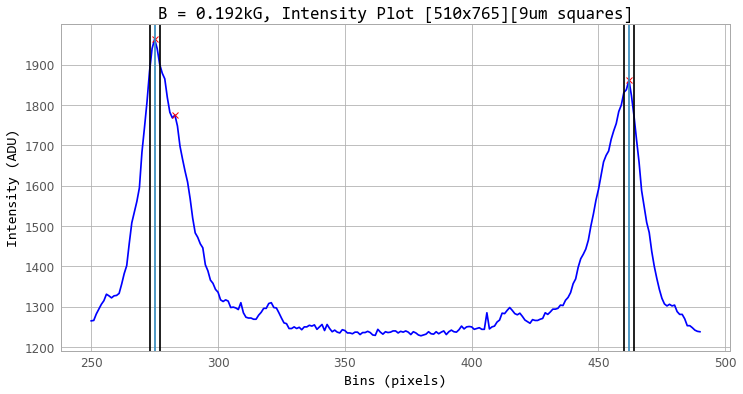

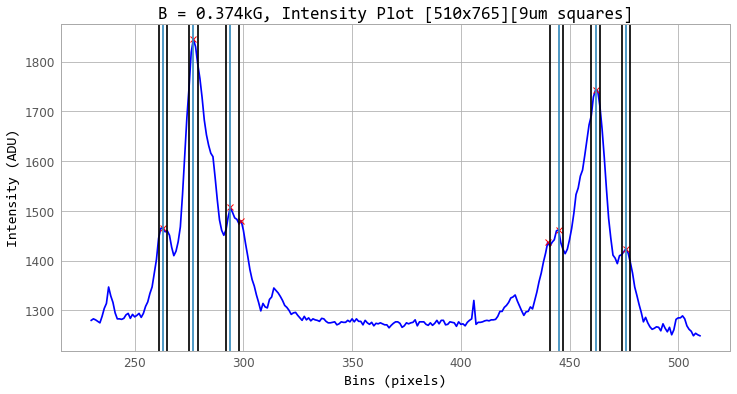

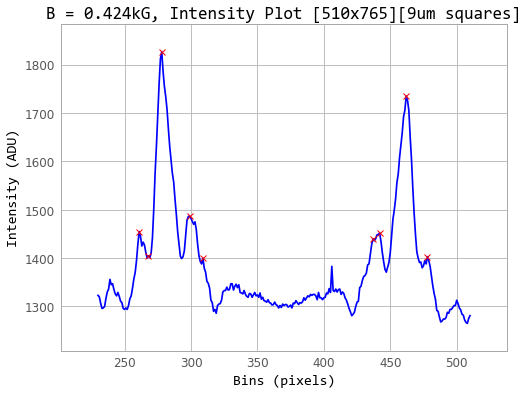

In [7]:
# STEP 5: TRUNCATE TO THE FIRST ORDER


peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(x1[0],y1[0],250,490,1415)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(x1[1],y1[1],230,510,1415)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(x1[2],y1[2],230,510,1400)

# THESES VIRTICAL LINES WERE USED TO DETERMINE THE WIDTH OF OUR ERROR


hf.Plots(x_1,y_1, 
    'B = 0.192kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks1,y1[0])
plt.axvline(peaks1[0])
plt.axvline(peaks1[0]+2, color = 'black')
plt.axvline(peaks1[0]-2, color = 'black')

plt.axvline(peaks1[2])
plt.axvline(peaks1[2]+2, color = 'black')
plt.axvline(peaks1[2]-2, color = 'black')

hf.Plots(x_2,y_2, 
    'B = 0.374kG, Intensity Plot [510x765][9um squares]', 
    'Bins (pixels)', 'Intensity (ADU)', figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks2,y1[1])
plt.axvline(peaks2[0])
plt.axvline(peaks2[0]+2, color = 'black')
plt.axvline(peaks2[0]-2, color = 'black')

plt.axvline(peaks2[1])
plt.axvline(peaks2[1]+2, color = 'black')
plt.axvline(peaks2[1]-2, color = 'black')

plt.axvline(peaks2[2])
plt.axvline(peaks2[2]+4, color = 'black')
plt.axvline(peaks2[2]-2, color = 'black')

plt.axvline(peaks2[5])
plt.axvline(peaks2[5]+2, color = 'black')
plt.axvline(peaks2[5]-4, color = 'black')

plt.axvline(peaks2[6])
plt.axvline(peaks2[6]+2, color = 'black')
plt.axvline(peaks2[6]-2, color = 'black')

plt.axvline(peaks2[7])
plt.axvline(peaks2[7]+2, color = 'black')
plt.axvline(peaks2[7]-2, color = 'black')

hf.Plots(x_3,y_3, 'B = 0.424kG, Intensity Plot [510x765][9um squares]', 'Bins (pixels)', 'Intensity (ADU)')
hf.PlotNewPeaks(peaks3,y1[2])

print('\nConclusion- Error To propagate Sigma X: \n \tnarraow peaks +/- 2 pixels\n\twider peaks +/- 3pixels')
print(f'Graph1: Peaks1 = {peaks1[0]} \n\tPeaks1-2 = {peaks1[0]-2}\n\tPeaks1+2 = {peaks1[0]+2}')

In [ ]:
# WANT
# pass in peak bin values get theta values (we do not need radius or diameter values)
# pass theta values to get delta E corrolating to B values 

In [ ]:
# STEP 6: Manually Calculate Radius (bc der is no oder way)
# hf.RadiusMeter(peakbin1, peakbin2)
# Create a large array of all the Radius values 
# With each set of radius values mark down the B values 

In [8]:
# Radius Values 
R1 = hf.RadiusMeter(peaks1[0], peaks1[2])

R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
R3_2 = hf.RadiusMeter(peaks3[2], peaks3[-2])
R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-3])

radii = [
    R2_1,R2_2,R2_3,
    R3_1,R3_2,R3_3
    ]

In [13]:
# Theta Values 
def ThetaRad(radius):
    f =135E-3 #Focal length in meters 135mm
    theta = np.arctan(radius/f)
    return theta

T1 = ThetaRad(R1)

T2_1 = ThetaRad(R2_1)
T2_2 = ThetaRad(R2_2)
T2_3 = ThetaRad(R2_3)

T3_1 = ThetaRad(R3_1)
T3_2 = ThetaRad(R3_2)
T3_3 = ThetaRad(R3_3)

In [14]:
# Delta E = Delta Theta'/ 0.88 [eV]

def DeltaE(ThetaA, ThetaB):
    DeltaThetaPrime = ThetaA**2 - ThetaB**2
    Ebar = 3.638E-12 #erg
    constant = 2/Ebar
    
    deltaE = DeltaThetaPrime/constant

    return deltaE
    
B1 = 0.374E3
delE1_1 = DeltaE(T2_1, T2_2)
delE1_2 = DeltaE(T2_2, T2_3)
B2 = 0.424E3
delE2_1 = DeltaE(T3_1, T3_2)
delE2_2 = DeltaE(T3_2, T3_3)

In [15]:
B_values = [B1, B1, B2, B2]
delEs = [delE1_1,delE1_2,delE2_1,delE2_2]

8.229574086217935e-20


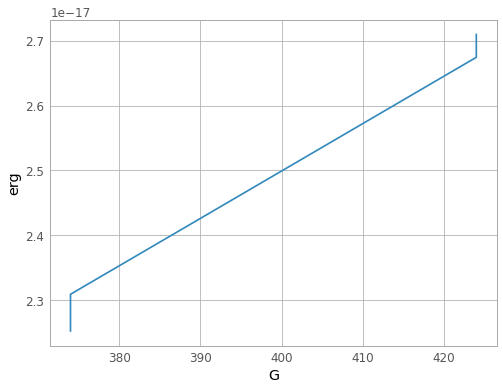

In [16]:
plt.plot(B_values, delEs)
plt.xlabel('G')
plt.ylabel('erg')
slope = np.polyfit(B_values, delEs,1)[0]
print(slope)

# Extract Radius and apply Error 
# Calculate Thetas (2 per plot)
# Error prop 
# Calculate Delta E 
# Plot Delta E vs B and prey for 1/2 mu 